In [1]:
%%time
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split

# !!!  I used strict pointers there, so u have to change it before running
# !!!               There are 2 cases in 2nd and 4th blocks

syspathTraining = str(os.getcwd()).replace('SubaevRuslan_1.ipynb','') + "/facebook-comment-volume-prediction-master/dataset/Training/"
fileTraining = ['Features_Variant_1.csv', 
                'Features_Variant_2.csv', 
                'Features_Variant_3.csv', 
                'Features_Variant_4.csv', 
                'Features_Variant_5.csv']
scaner = StandardScaler()

fullTraining = pd.concat(pd.read_csv(syspathTraining + file, index_col=False, header=None) for file in fileTraining)
y = np.array(fullTraining[53]).reshape(-1,1)

x = fullTraining.iloc[:,:-1]
x = scale(x, axis=0)

print(x.shape)
print(y.shape,end='\n\n')

(602813, 53)
(602813, 1)

Wall time: 6.61 s


In [2]:
%%time
import copy
from sklearn.metrics import mean_squared_error
from math import sqrt

def MSE(xb,y,theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)

# Adding ones to the X matrix
xb = np.c_[np.ones((len(x),1)),x]
# xbStandartized = scaner.fit_transform(copy.deepcopy(xb))
# print(np.mean(xbStandartized[:,:]), np.std(xbStandartized[:,:]))

# Num of any samples
m = len(y) 
cost = []
learningRate = 0.0018
numIterations = 1200

# Random initialization with standard normal distribution -- randn(.,.)
theta = np.random.randn(54,1) 

# Start gradient descent Uuuf
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (54,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))
print(theta.shape, end='\n\n')

(54, 1)

Wall time: 1min 6s


Wall time: 471 ms


Text(0, 0.5, 'MSE')

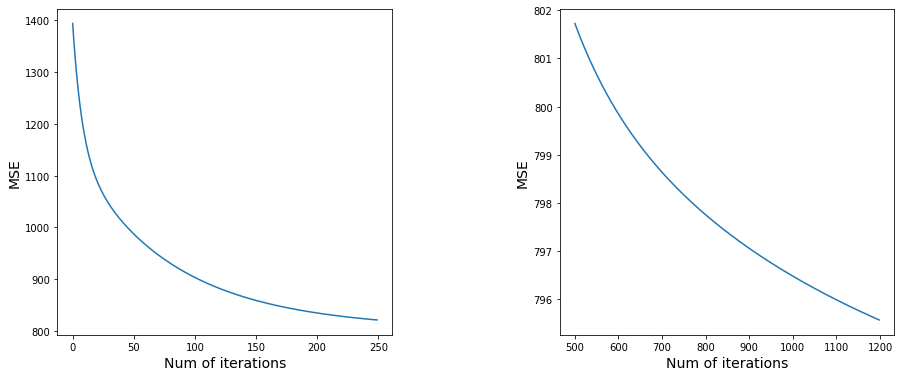

In [3]:
%%time
import matplotlib.pyplot as plt

# Out the MSE jumping over learning rate and iterations
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

ax[0].plot(range(0,250), cost[0:250])
ax[1].plot(range(500,1199), cost[500:1199])
plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('Num of iterations', fontsize = 14)
ax[1].set_xlabel('Num of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)

In [5]:
%%time
X_train_list = []
y_train_list = []

"""    Now fill in every list of 5 vars
      plus one more == summury of all-rs   """

for i in range(5):
    delta = pd.read_csv(syspathTraining + fileTraining[i], index_col=False, header=None).iloc[:,:-1]
    delta = scale(delta,axis=0)
    X_train_list.append(delta)

    delta = pd.read_csv(syspathTraining + fileTraining[i], index_col=False, header=None).iloc[:,-1:]
    y_train_list.append(delta)

X_train_list.append(x)
y_train_list.append(fullTraining.iloc[:,-1:])

"""     And now for the test-ones     """

sysPathTesting = str(os.getcwd()).replace('SubaevRuslan_1.ipynb','') + "/facebook-comment-volume-prediction-master/dataset/Testing/TestSet/"
fileTesting = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv',
              'Test_Case_4.csv', 'Test_Case_5.csv',  
              'Test_Case_6.csv', 'Test_Case_7.csv', 'Test_Case_8.csv', 
              'Test_Case_9.csv', 'Test_Case_10.csv']
X_test_list = []
y_test_list = []
fullTesting = pd.concat(pd.read_csv(sysPathTesting + path, index_col=False, header=None) for path in fileTesting)

for i in range(10):
    delta = pd.read_csv(sysPathTesting + fileTesting[i], index_col=False, header=None).iloc[:,:-1]
    delta = scale(delta, axis=0)
    X_test_list.append(delta)

    delta = pd.read_csv(sysPathTesting + fileTesting[i], index_col=False, header=None).iloc[:,-1:]
    y_test_list.append(delta)

xT = fullTesting.iloc[:,:-1]
xT = scale(xT, axis=0)
X_test_list.append(xT)
y_test_list.append(fullTesting.iloc[:,-1:])

Wall time: 5.03 s


In [6]:
%%time
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import r2_score
'''
                    ##           Def for Training-ones            ##
'''
final=[]
final_any=[]
rmse_any=[]
r2_any=[]
s=0
t=1

for i in range(6):
    for every in X_train_list[i]:
        for each in every:
            s+=each*theta[t]
            t+=1

        if(s<0): final.append(0)
        else: final.append(float(s).__round__())
        s=0  
        t=1

    final = np.array(final)
    rmse = sqrt(mean_squared_error(y_train_list[i], final))
    rmse_any.append(rmse)
    final_any.append(final)
    final=[]

    if i == 5: 
        print("Variant overall: RMSE", int(rmse*1000)/1000)
    else:
        r2 = r2_score(np.array(y_train_list[i]), np.array(final_any[i]))
        r2_any.append(r2)
        print("Variant {0}: ".format(i + 1),' RMSE: ', int(rmse*1000)/1000,'\n\t','    R**2: ',int(r2*10000)/10000)

r2 = r2_score(np.array(y_train_list[5]), np.array(final_any[5]))
r2_any.append(r2)
print('\t\t R**2: ',int(r2*10000)/10000, end='\n\n')

check = pd.DataFrame({'Actual': np.array(y_train_list[0]).tolist(), 'Predicted': np.array(final_any[0]).tolist()})
check

Variant 1:   RMSE:  29.399 
	     R**2:  0.3139
Variant 2:   RMSE:  29.901 
	     R**2:  0.312
Variant 3:   RMSE:  27.042 
	     R**2:  0.3471
Variant 4:   RMSE:  28.191 
	     R**2:  0.325
Variant 5:   RMSE:  27.946 
	     R**2:  0.336
Variant overall: RMSE 28.204
		 R**2:  0.3302

Wall time: 2min 56s


,Actual,Predicted
0,[0],0
1,[0],0
2,[0],0
3,[0],0
4,[0],0
...,...,...
40944,[1],27
40945,[2],29
40946,[72],162
40947,[28],48


In [7]:
%%time
'''
                    ##           Def for Test-ones            ##
'''

final_Test=[]
final_any_Test=[]
rmse_any_Test=[]
r2_any_Test=[]
s=0
t=1

for i in range(11):
    for every in X_test_list[i]:
        for each in every:
            s+=each*theta[t]
            t+=1
        
        if(s<0): final_Test.append(0)
        else: final_Test.append(float(s).__round__())
        s=0  
        t=1
    
    final_Test = np.array(final_Test)
    rmse = sqrt(mean_squared_error(y_test_list[i], final_Test))
    rmse_any_Test.append(rmse)
    final_any_Test.append(final_Test)
    final_Test=[]
    
    if i == 10:
        print("Variant overall: RMSE", int(rmse*1000)/1000)
    else:
        r2 = r2_score(np.array(y_test_list[i]), np.array(final_any_Test[i]))
        r2_any_Test.append(r2)
        if i!=9:
            print("Variant {0}: ".format(i + 1),' RMSE: ', int(rmse*1000)/1000,'\n\t','    R**2: ',int(r2*10000)/10000)
        else:
            print("Variant {0}: ".format(i + 1),'RMSE: ', int(rmse*1000)/1000,'\n\t','    R**2: ',int(r2*10000)/10000)

r2 = r2_score(np.array(y_test_list[10]), np.array(final_any_Test[10]))
r2_any_Test.append(r2)
print('\t\t R**2: ',int(r2*10000)/10000, end='\n\n')

check = pd.DataFrame({'Actual': np.array(y_test_list[5]).tolist(), 'Predicted': np.array(final_any_Test[5]).tolist()})
check

Variant 1:   RMSE:  76.986 
	     R**2:  0.1604
Variant 2:   RMSE:  76.136 
	     R**2:  0.2165
Variant 3:   RMSE:  39.722 
	     R**2:  0.2292
Variant 4:   RMSE:  131.925 
	     R**2:  0.0377
Variant 5:   RMSE:  56.973 
	     R**2:  0.1529
Variant 6:   RMSE:  29.871 
	     R**2:  0.4478
Variant 7:   RMSE:  63.516 
	     R**2:  0.1618
Variant 8:   RMSE:  217.912 
	     R**2:  0.0031
Variant 9:   RMSE:  48.692 
	     R**2:  -0.1058
Variant 10:  RMSE:  109.304 
	     R**2:  0.1581
Variant overall: RMSE 100.883
		 R**2:  0.0717

Wall time: 323 ms


,Actual,Predicted
0,[0],0
1,[2],0
2,[188],63
3,[333],108
4,[1],0
...,...,...
95,[1],2
96,[11],5
97,[8],3
98,[0],0


In [8]:
%%time
'''
                    ##           Output            ##
'''
indexes = []
for i in range(54):
    indexes.append('f-'+str(i))
main = []
main.append(r2_any[:5]), main.append(rmse_any[:5]), main.append(rmse_any_Test[:5])
main = np.array(main)

e = []
delta = 0

# E calc
for each in main:
    for every in each:
        delta+=every
    e.append(delta/5)
    delta = 0

# STD calc
std = []
for every in main:
    std.append(np.var(every))

dfOutMain = pd.DataFrame(main.reshape(3,5), index=['R2', 'RMSE-train', 'RMSE-test'], columns=['T1','T2','T3','T4','T5'])
dfOutPar = pd.DataFrame({
    'E': e,
    'STD': std,
}, index=['R2', 'RMSE-train', 'RMSE-test'])
dfOutCost = pd.DataFrame(theta, index=indexes, columns=['Features'])

Wall time: 1.99 ms


In [12]:
out1 = pd.concat([dfOutMain,dfOutPar],sort=False,axis=1)
out = pd.concat([out1,dfOutCost],sort=False,axis=1)

with pd.ExcelWriter("SubaevRuslan.xlsx") as writer:
    out.to_excel(writer)

In [13]:
out

,T1,T2,T3,T4,T5,E,STD,Features
R2,0.313919,0.312003,0.347128,0.325005,0.336074,0.326826,0.000177,NaN
RMSE-train,29.399780,29.901173,27.042845,28.191634,27.946662,28.496419,1.059479,NaN
RMSE-test,76.986492,76.136785,39.722538,131.925168,56.973941,76.348985,961.210508,NaN
f-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.093006
f-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.312826
f-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.357470
f-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.343880
f-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112294
f-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141869
f-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.003962


In [15]:
# # Coefficient of determination
# d1 = np.array(y_train_list[5]) - np.array(pd.DataFrame(final))
# d2 = np.array(y_train_list[5]) - np.array(pd.DataFrame(final)).mean()
# r2 = 1 - d1.dot(d1)/d2.dot(d2)

# print("Coefficient of determination: ", r2)

# def rSquare(estimations, measureds):
#     """ 
#             Compute the coefficient of determination of random data. 
#     This metric gives the level of confidence about the model used to model data
#     """

#     SEE =  (( np.array(measureds) - np.array(estimations) )**2 ).sum()
#     mMean = (np.array(measureds)).sum() / float(len(measureds))
#     dErr = ((mMean - measureds)).sum()

#     return 1 - (SEE / dErr)

# rSquare(np.array(y_train_list[5]),np.array(pd.DataFrame(final))